In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from dashboard_helper import get_learner, inspect_runs, predict, get_transform_from_learner
from cotrain_helper import *
from paracoord_helper import *

%load_ext autoreload
%autoreload 2

In [2]:
dataset = 'fused_sharp'
seed = 4

In [3]:
## The working directory should be in the branch of leaderboard3
dfs = {estimator: predict(dataset, seed, estimator)
       for estimator in ['CNN', 'LSTM']}

/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:13: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  from arnet.transforms import get_transform


Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1, 32, 32]       36,928
|    └─BatchNorm3d: 2-10                 [-1, 64, 1, 32, 32]       128
|    └─ReLU: 2-11                        [-1, 64, 1, 32, 32]       --
|    └─MaxPool3d: 2-12                   [-1, 64, 1, 16, 16]       --


/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  self._construct_datasets(balanced=cfg.DATA.BALANCED)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  


/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  self._construct_datasets(balanced=cfg.DATA.BALANCED)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

In [13]:
df_train = get_split(dfs, 'train')
df_val = get_split(dfs, 'val')
df_test = get_split(dfs, 'test')

In [5]:
X_val = df_val[['LSTM prob', 'CNN prob']].to_numpy()
y_val = df_val['label'].to_numpy().astype(int)

ml = MetaLearner(step=0.1)
ml.fit(X_val, y_val)

In [15]:
df_train['Ensemble prob'] = np.dot(
    df_train[['LSTM prob', 'CNN prob']],
    [ml.alpha, 1 - ml.alpha]
)
df_val['Ensemble prob'] = np.dot(
    df_val[['LSTM prob', 'CNN prob']],
    [ml.alpha, 1 - ml.alpha]
)
df_test['Ensemble prob'] = np.dot(
    df_test[['LSTM prob', 'CNN prob']],
    [ml.alpha, 1 - ml.alpha]
)

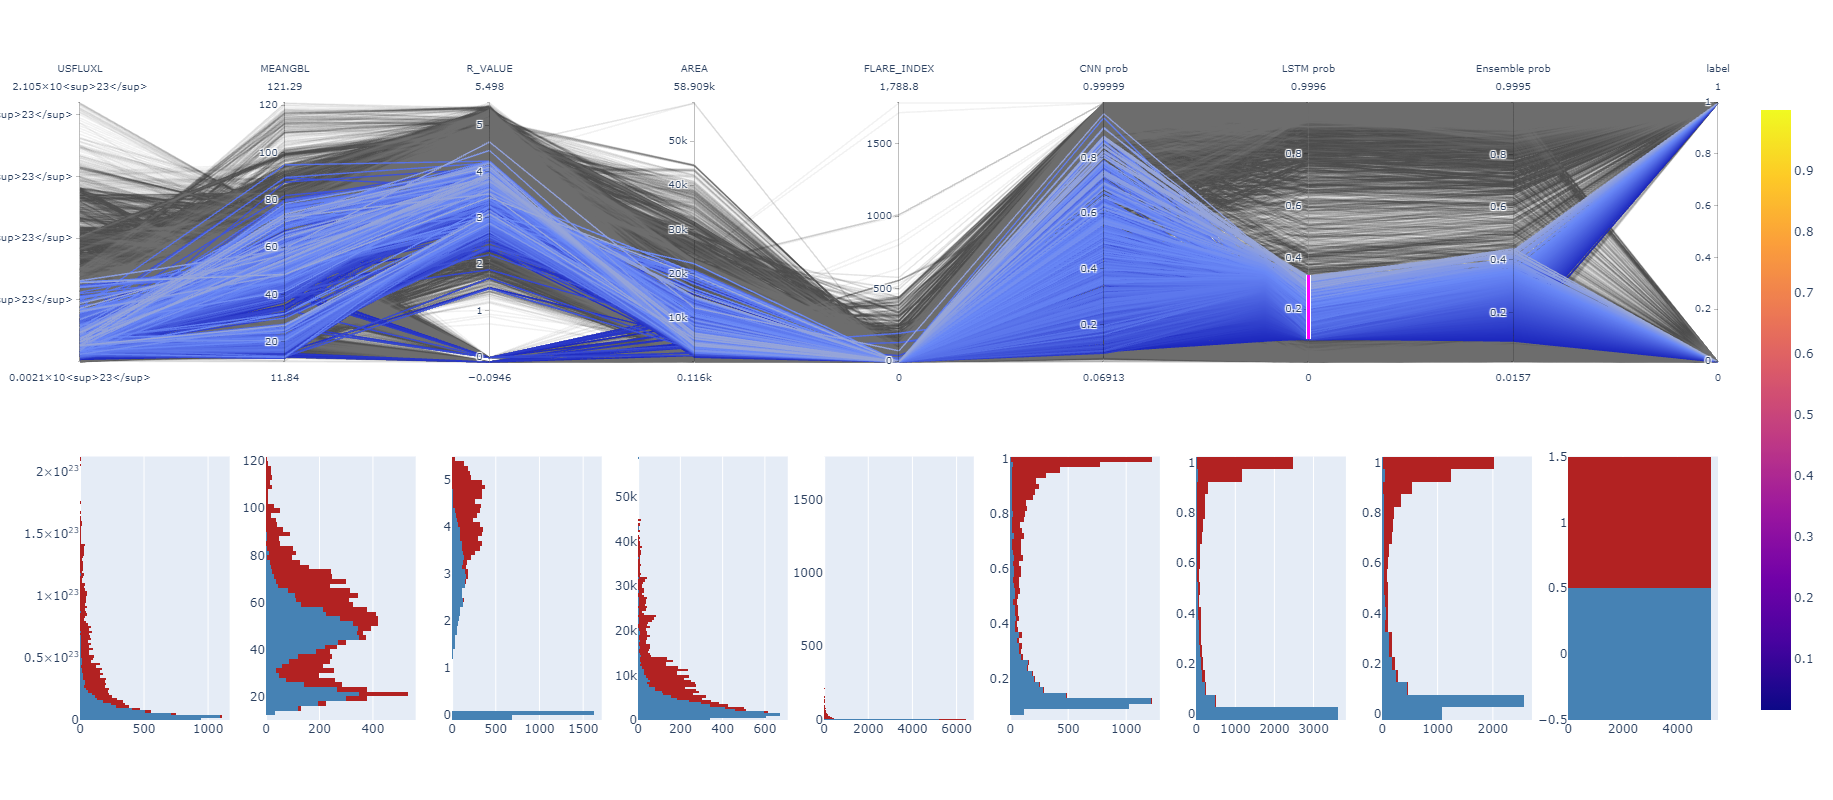

In [16]:
# columns = ['USFLUXL', 'Ensemble prob', 'label']
columns = ['USFLUXL', 'MEANGBL', 'R_VALUE', 'AREA', 'FLARE_INDEX', 'CNN prob', 'LSTM prob', 'Ensemble prob', 'label']

df_train['label'] = df_train['label'].astype(int)
fig = parallel_coordinates_and_hist(df_train, color='Ensemble prob', dimensions=columns)
fig.update_layout(
    height=800
)

## Visualize samples

In [7]:
from arnet.dataset import ActiveRegionDataModule
learner = get_learner(dataset, seed, 'CNN')
# hotfix
learner.cfg.DATA.DATABASE = '/home/zeyusun/work/flare-prediction-smarp/' + str(learner.cfg.DATA.DATABASE)
learner.cfg.DATA.AUXDATA = '/home/zeyusun/work/flare-prediction-smarp/' + str(learner.cfg.DATA.AUXDATA)
learner.cfg.DATA.TRANSFORMS = []
learner.cfg.DATA.FEATURES = ['MAGNETOGRAM', 'USFLUXL', 'MEANGBL', 'R_VALUE', 'AREA']
dm = ActiveRegionDataModule(learner.cfg)

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  self._construct_datasets(balanced=cfg.DATA.BALANCED)
